In [31]:
import gym
import matplotlib.pyplot as plt
from gym.wrappers import RecordVideo
from gym import spaces
import json
import math

In [ ]:
class GardenEnv(gym.Env):
    def __init__(self, box_size, crop_data):
        super().__init__()
        self.t = 0
        self.box_size = box_size
        self.crop_data = crop_data
        self.actions = ['plant', 'water', 'abstain', 'notify']
        
        with open('../data/render_colors.json') as json_file:
            colors = json.load(json_file)
        self.colors = colors
        
    def step(self, action):
        self.t += 1
        """ Takes a step with given action and returns the resulting environment.
        Args:
            action: int 
            
        Returns:
            env: state_dict: {
                    plant1: [type, location, radius, water_status],
                    plant2: [type, location, radius, water_status],
                    ...
                }
        """
        return env
    
    def reset(self):
        self.t = 0
        return 0
    
    def render(self, mode='human', state):
        if (mode=='human'):
            human_render(state)
        else:
            return machine_render(state)
            
    def human_render(self, state):
        fig, ax = plt.subplots()
        ax.set_xlim = self.box_size[0]
        ax.set_ylim = self.box_size[1]
        for plant in state.keys():
            ax.add_patch(plt.Circle(state[k][1], radius=state[k][2], color=self.colors[state[k][0]]))
        fig.savefig(f'env_at_time_{self.t}.png')
    
    def machine_render(self, state):
        return 0
            

In [15]:
# load crop data
with open('../data/plant_data.json') as json_file:
    plant_data = json.load(json_file)

In [14]:
# load color data
with open('../data/render_colors.json') as json_file:
    colors = json.load(json_file)

In [18]:
plant_data['bok_choy']

[{'id': '2',
  'name': 'bok_choy',
  'days_to_mature': '50',
  'mature_radius': '20',
  'H_water_freq': '48'}]

In [64]:
class Plant:
    def __init__(self, species):
        self.species = species
        self.water_freq = int(plant_data[species][0]['H_water_freq'])
        self.mature_radius = int(plant_data[species][0]['mature_radius'])
        self.days_to_mature = int(plant_data[species][0]['days_to_mature'])
        self.color = tuple(colors[species])
        self.alive = 1
        self.water = int(plant_data[species][0]['H_water_freq']) / 2 # water is measured in hours
        
    # time is measured in days
    def get_radius(self, dt):
        if dt < self.days_to_mature:
            return self.mature_radius * (dt / self.days_to_mature)
        if dt > self.days_to_mature + 5: # has a 5 day ripe period
            self.alive = 0
            dead_radius = 0.55 * self.mature_radius
            
            decay_factor = math.exp(-0.2 * (dt - self.days_to_mature - 5))
            decayed_radius = self.mature_radius * decay_factor
            return max(decayed_radius, dead_radius)
        return self.mature_radius
        
    def overlap_area(self, map):
        return 0


    def get_health(self):
        score = 1
        if (self.water < 0): score += 0.006 * (self.water / self.water_freq)
        if (self.overlap_area(map) > 0): score -= 0.5 * (self.overlap_area(map) / (self.mature_radius ** 2 * math.pi))
        return score
        
    def get_color(self):
        if self.get_health() < 0:
            return [0, 0, 0]
        return self.color * self.get_health()
    
    def get_circle_object(self, dt):
        radius = self.get_radius(dt)
        color = self.get_color()
        return plt.Circle(self.species, radius=radius, color=color)
        
    

In [65]:
bokbok = Plant('bok_choy')

In [66]:
for i in range(10):
    print(bokbok.get_health())

0.96875
0.96875
0.96875
0.96875
0.96875
0.96875
0.96875
0.96875
0.96875
0.96875


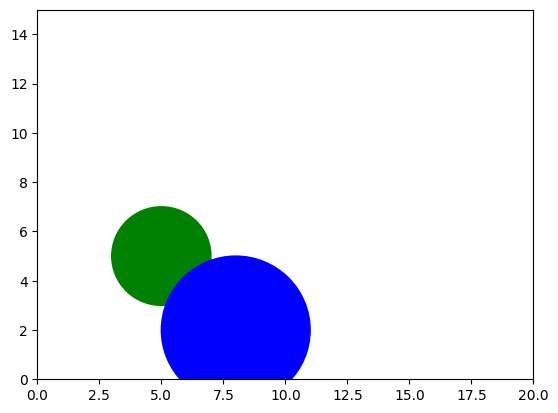

In [9]:
state = {
    'plant1': ["radish", (5, 5), 2, 10],
    'plant2': ["bok_choy", (8, 2), 3, 10]
}
colors = {
    "radish": "green",
    "bok_choy": "blue"
    }
fig, ax = plt.subplots()
for k in state.keys():
    ax.add_patch(plt.Circle(state[k][1], radius=state[k][2], color=colors[state[k][0]]))


ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
# circle1 = plt.Circle((0, 0.25), 0.2, color='green')
# circle2 = plt.Circle((1, 0.5), 0.2, color='blue')

# ax.add_patch(circle1)
# ax.add_patch(circle2)

fig.savefig('firstplot.png')



In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
